In [83]:
import pandas as pd
import os
import json
file_path = r"tayara_ads_complete.json"

with open(file_path, "r", encoding="utf-8") as f:
    annonces = json.load(f)
print(type(annonces))
# Normalisation : on force annonces à être une LISTE




<class 'dict'>


In [84]:
annonces_list = annonces["ads"]  # récupère la liste d'annonces
print(f"{len(annonces_list)} annonces trouvées")
print(type(annonces_list[0]))  # doit être dict

2453 annonces trouvées
<class 'dict'>


In [85]:
import csv

def json_to_csv(annonces, output_file="tayara_ads_plat.csv"):
    rows = []
    all_columns = set()

    for annonce in annonces:
        if not isinstance(annonce, dict):
            continue

        row = {}

        # 1️⃣ Champs simples (tout sauf dict ou list)
        for key, value in annonce.items():
            if isinstance(value, (str, int, float, bool)) and key != "ad_params":
                row[key] = value
                all_columns.add(key)

        # 2️⃣ Champs imbriqués "location"
        location = annonce.get("location", {})
        if isinstance(location, dict):
            for k, v in location.items():
                # Convertir dict vide en chaîne vide
                if isinstance(v, dict) and not v:
                    v = ""
                col = f"location_{k}"
                row[col] = v
                all_columns.add(col)

        # 3️⃣ ad_params → colonnes dynamiques
        for param in annonce.get("ad_params", []):
            if isinstance(param, dict):
                label = param.get("label", "").strip()
                value = param.get("value", "")
                if label:
                    row[label] = value
                    all_columns.add(label)

        rows.append(row)

    # Vérifier qu'on a bien des colonnes
    if not all_columns:
        print("❌ Aucun champ trouvé pour créer des colonnes ! Vérifie ton JSON.")
        return

    # Écriture CSV
    all_columns = sorted(all_columns)
    with open(output_file, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=all_columns)
        writer.writeheader()
        writer.writerows(rows)

    print(f"✅ CSV généré : {output_file}")
    print(f"➡️ {len(rows)} lignes | {len(all_columns)} colonnes")


In [86]:
json_to_csv(annonces_list, "tayara_ads_plat.csv")


✅ CSV généré : tayara_ads_plat.csv
➡️ 2453 lignes | 42 colonnes


In [87]:
import pandas as pd

with open("tayara_ads_plat.csv", "r", encoding="utf-8") as f:
    reader = pd.read_csv(f)
reader


,Ascenseur,Caméra de surveillance,Celliers,Chambres,Chauffage central,Climatisation,Jardin,Jardin privatif,Pack domotique,Parking,...,salle de sport,scraped_at,seller_email,seller_is_shop,seller_name,seller_phone,sold,title,url,views
0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T18:01:10.389956,ramzi.dkhil@gmail.com,True,EDF immobilière,21629276849,False,A Vendre Villa pied dans l'eau à Ras Jebel,https://www.tayara.tn/item/maisons-et-villas/b...,0
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T18:01:12.098606,maktaritana@yahoo.fr,True,Pro-Immobilière,21650499055,False,A vendre à HAMMAMET nord une villa s+4 suites,https://www.tayara.tn/item/maisons-et-villas/t...,0
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T18:01:13.823855,info@maxulaimmobiliere.Tn,True,Maxula Immobiliere,21628808309,False,À VENDRE VILLA S+3 À RÉNOVER À BEN AROUS,https://www.tayara.tn/item/maisons-et-villas/b...,0
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T18:01:17.913237,NaN,False,ahmed,21655667501,False,A louer : Etage de villa S+3 à Rades Meliene.,https://www.tayara.tn/item/maisons-et-villas/b...,0
4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T18:01:19.717246,NaN,False,haj othman,21624150461,False,Location maison deVacances à Ain draham,https://www.tayara.tn/item/maisons-et-villas/j...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,Ascenseur,Caméra de surveillance,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Parking,...,NaN,2025-12-17T19:22:46.564738,bichaarchi@hotmail.fr,True,Immobilier Magic House,21653403311,False,Appartement – 2ème Étage | S+3 | 135 m²,https://www.tayara.tn/item/immobilier-neuf/sou...,0
2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T19:22:48.465657,gts@gmail.com,True,GTS Immo,21699307890,False,a vendre un terrain pour les investisseurs,https://www.tayara.tn/item/terrains-et-fermes/...,0
2450,Ascenseur,Caméra de surveillance,NaN,2.0,Chauffage central,Climatisation,NaN,NaN,NaN,Parking,...,NaN,2025-12-17T19:22:50.240846,contact@maisondurable.org,True,First Résidence,21654644652,False,A VENDRE – Appartement S+3 Haut Standing au 2 ...,https://www.tayara.tn/item/immobilier-neuf/tun...,0
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2025-12-17T19:22:52.173497,portals.europe@iwgplc.com,True,Regus,21670022681,False,Un bureau au design remarquable pour 5 personn...,https://www.tayara.tn/item/bureaux-et-plateaux...,0


Mapping


In [88]:
GROUPS = {
    "jardin": ["Jardin", "Jardin privatif"],
    "parking": ["Parking", "Parking sous sol"],
    "piscine": ["Piscine Privative", "Piscine Collective"],
    "ascenseur": ["Ascenseur"],
    "chauffage_central": ["Chauffage central"],
    "terrasse": ["Terrasse"],
    "balcon": ["Balcon"],
    "climatiseur": ["Climatisation"]
}


def fusionner_colonnes_generiques(df, groups):
    for generic, cols in groups.items():
        # garder uniquement les colonnes existantes
        cols_existantes = [c for c in cols if c in df.columns]

        if not cols_existantes:
            continue

        # True si au moins une colonne non NaN
        df[generic] = df[cols_existantes].notna().any(axis=1)

        # supprimer les colonnes détaillées
        df.drop(columns=cols_existantes, inplace=True)

    return df
df = fusionner_colonnes_generiques(reader, GROUPS)



In [89]:
df.columns

Index(['Caméra de surveillance', 'Celliers', 'Chambres', 'Pack domotique',
       'Salles de bains', 'Suite parentale', 'Superficie', 'Type de bien',
       'Type de transaction', 'category', 'currency', 'description',
       'favorites', 'id', 'image_count', 'location_coordinates',
       'location_delegation', 'location_governorate', 'page_number', 'phone',
       'price', 'published_date', 'salle de sport', 'scraped_at',
       'seller_email', 'seller_is_shop', 'seller_name', 'seller_phone', 'sold',
       'title', 'url', 'views', 'jardin', 'parking', 'piscine', 'ascenseur',
       'chauffage_central', 'terrasse', 'climatiseur'],
      dtype='object')

In [90]:
df["location_governorate"] = (
    df["location_governorate"]
    .str.lower()
    .str.strip()
    .str.replace("-", " ", regex=False)
)
grand_tunis = ["tunis", "ben arous", "la manouba", "ariana"]

df = df[df["location_governorate"].isin(grand_tunis)]

In [91]:
len(df)

1114

In [92]:
df=df[(df['Type de transaction']=='À Vendre')& ~(df['Type de bien'].isin( [ 'Local Commercial', 'Bureau', 'Duplexe']))]

In [93]:
len(df)

1066

In [94]:
df.loc[df['category'] == 'immobilier_neuf', 'Type de bien'] = 'Appartement'


In [95]:
df[df['category']=='immobilier_neuf']['Type de bien'].unique()

array(['Appartement'], dtype=object)

In [96]:
df.loc[:, 'haut_standing'] = df['category'] == 'immobilier_neuf'



In [97]:
df.columns

Index(['Caméra de surveillance', 'Celliers', 'Chambres', 'Pack domotique',
       'Salles de bains', 'Suite parentale', 'Superficie', 'Type de bien',
       'Type de transaction', 'category', 'currency', 'description',
       'favorites', 'id', 'image_count', 'location_coordinates',
       'location_delegation', 'location_governorate', 'page_number', 'phone',
       'price', 'published_date', 'salle de sport', 'scraped_at',
       'seller_email', 'seller_is_shop', 'seller_name', 'seller_phone', 'sold',
       'title', 'url', 'views', 'jardin', 'parking', 'piscine', 'ascenseur',
       'chauffage_central', 'terrasse', 'climatiseur', 'haut_standing'],
      dtype='object')

In [98]:
df['category'] = df['Type de bien'].fillna('Villa')


In [99]:
df.category.unique()

array(['Villa', 'Appartement'], dtype=object)

In [100]:
import numpy as np
df['texte'] = df['title'] + '\n' + df['description']

df['surface']=df['Superficie']
df['categorie']=df['category']
df['nombre_des_chambres']=df['Chambres']
df['nombre_des_salles_de_bains']=df['Salles de bains']
df['prix']=df['price']
df['balcon'] = False
df['vue_panoramique'] = False
df['etage'] = 0
df['latitude'] = pd.to_numeric(df.get('latitude', np.nan), errors='coerce')
df['longitude'] = pd.to_numeric(df.get('longitude', np.nan), errors='coerce')

In [101]:
df.columns

Index(['Caméra de surveillance', 'Celliers', 'Chambres', 'Pack domotique',
       'Salles de bains', 'Suite parentale', 'Superficie', 'Type de bien',
       'Type de transaction', 'category', 'currency', 'description',
       'favorites', 'id', 'image_count', 'location_coordinates',
       'location_delegation', 'location_governorate', 'page_number', 'phone',
       'price', 'published_date', 'salle de sport', 'scraped_at',
       'seller_email', 'seller_is_shop', 'seller_name', 'seller_phone', 'sold',
       'title', 'url', 'views', 'jardin', 'parking', 'piscine', 'ascenseur',
       'chauffage_central', 'terrasse', 'climatiseur', 'haut_standing',
       'texte', 'surface', 'categorie', 'nombre_des_chambres',
       'nombre_des_salles_de_bains', 'prix', 'balcon', 'vue_panoramique',
       'etage', 'latitude', 'longitude'],
      dtype='object')

In [102]:
final_columns = [
    'id',
    'surface',
    'texte',
    'nombre_des_chambres',
    'nombre_des_salles_de_bains',
    'haut_standing',
    'terrasse',
    'balcon',
    'etage',
    'parking',
    'ascenseur',
    'jardin',
    'vue_panoramique',
    'climatiseur',
    'chauffage_central',
    'piscine',
    'prix',
    'categorie',
    'latitude',
    'longitude',
    # localisation conservée
   
    'location_delegation',
    'location_governorate'
]

df_final = df[final_columns]


In [103]:
"""import requests
import time
import json

# List of all your places
places = [
    "Boumhel", "Borj Louzir", "Ezzahra", "El Manar 2", "Gammarth",
    "Riadh Andalous", "Ennasr", "Tunis", "Ezzouhour", "Sidi Thabet",
    "La Manouba", "Les Jardins El Menzah 2", "El Omrane", "L Aouina",
    "El Manar 1", "La Marsa", "La Soukra", "Raoued", "Manar",
    "Chotrana 3", "Le Kram", "Hraïria", "Fouchana", "Manouba Ville",
    "Chotrana", "Chotrana 1", "Hammam Chott", "Mohamedia", "Mornaguia",
    "Nouvelle Ariana", "El Menzah 8", "Mutuelleville", "Ettahrir",
    "Denden", "Borj Cedria", "Ksar Said", "Monfleury", "Chotrana 2",
    "El Mourouj 4", "Mnihla", "Bab Souika", "Douar Hicher", "Ariana",
    "Oued Ellil", "Ettadhamen", "Alain Savary", "Carthage", "Bellevue",
    "El Mourouj 3", "Djedeida", "Mégrine", "El Mourouj", "Ariana Ville",
    "Cité El Khadra", "Sidi Hassine", "El Mourouj 6", "El Menzah 1",
    "Cité jardin", "Agba", "Médina", "Sidi El Béchir", "Cite Ennkhilet",
    "Ariana Essoughra", "Séjoumi", "Lac 2", "Sidi Bou Said", "El Ouardia",
    "Lac 1", "Dar Fadhal", "Ain Zaghouan Sud", "El Battan", "El Menzah 7",
    "Jardins De Carthage", "Kalâat Andalous", "La Goulette", "El Mourouj 1",
    "Ain Zaghouan Nord", "Sidi Rezig", "Cité Hedi Nouira", "Tunis Belvedere",
    "Cité Olympique", "El Kabaria"
]

# Dictionary to store results
results = {}

# Loop through each place and query OSM Nominatim
for place in places:
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": place + ", Tunisia",  # append country for better accuracy
        "format": "json",
        "limit": 1
    }
    try:
        response = requests.get(url, params=params, headers={"User-Agent": "my-app"})
        data = response.json()
        if len(data) > 0:
            results[place] = {"lat": float(data[0]["lat"]), "lon": float(data[0]["lon"])}
        else:
            results[place] = {"lat": None, "lon": None}  # place not found
    except Exception as e:
        results[place] = {"lat": None, "lon": None}
    
    time.sleep(1)  # polite delay to respect Nominatim usage policy

# Optional: save results to JSON file
with open("places_coordinates.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

print("Coordinates fetching complete! Results saved to 'places_coordinates.json'.")"""


'import requests\nimport time\nimport json\n\n# List of all your places\nplaces = [\n    "Boumhel", "Borj Louzir", "Ezzahra", "El Manar 2", "Gammarth",\n    "Riadh Andalous", "Ennasr", "Tunis", "Ezzouhour", "Sidi Thabet",\n    "La Manouba", "Les Jardins El Menzah 2", "El Omrane", "L Aouina",\n    "El Manar 1", "La Marsa", "La Soukra", "Raoued", "Manar",\n    "Chotrana 3", "Le Kram", "Hraïria", "Fouchana", "Manouba Ville",\n    "Chotrana", "Chotrana 1", "Hammam Chott", "Mohamedia", "Mornaguia",\n    "Nouvelle Ariana", "El Menzah 8", "Mutuelleville", "Ettahrir",\n    "Denden", "Borj Cedria", "Ksar Said", "Monfleury", "Chotrana 2",\n    "El Mourouj 4", "Mnihla", "Bab Souika", "Douar Hicher", "Ariana",\n    "Oued Ellil", "Ettadhamen", "Alain Savary", "Carthage", "Bellevue",\n    "El Mourouj 3", "Djedeida", "Mégrine", "El Mourouj", "Ariana Ville",\n    "Cité El Khadra", "Sidi Hassine", "El Mourouj 6", "El Menzah 1",\n    "Cité jardin", "Agba", "Médina", "Sidi El Béchir", "Cite Ennkhilet",\n

In [104]:
coords_map = {
    "Ben Arous": {"lat": 36.8133756, "lon": 10.2930588},
    "Radès": {"lat": 36.767891, "lon": 10.2724617},
    "Ghazela": {"lat": 36.88266445, "lon": 10.179112983298108},
    "El Menzah 9": {"lat": 36.83561325, "lon": 10.158361532128072},
    "El Menzah 5": {"lat": 36.8491513, "lon":10.1745134},
    "Medina Jedida": {"lat": 36.742946, "lon":10.2507635},
    "Cité Ennasr 2": {"lat": 36.8668995, "lon": 10.15447030677053},
    "Le Bardo": {"lat":36.8142752, "lon": 10.1374251},
    "Hammam Lif": {"lat": 36.7188, "lon": 10.3377872},
    "Montplaisir": {"lat": 36.8170312, "lon": 10.1863745},
    "Borj El Amri": {"lat": 36.6758703, "lon": 9.848723202133975},
    "Ain Zaghouen": {"lat": 36.8548305, "lon":10.2847586},
    "Mornag": {"lat":36.587213299999995, "lon":10.2437597},
    "El Menzah 6": {"lat": 36.848456150000004, "lon": 10.163424432628062},
    "Khaznadar": {"lat": 36.8052747, "lon": 10.12655322024668},
    "El Omrane Supérieur": {"lat": 36.8346533, "lon": 10.129857933607912},
    'Boumhel': {'lat': 36.9208825, 'lon': 10.1371088},
 'Borj Louzir': {'lat': 36.8606537, 'lon': 10.2087006},
 'Ezzahra': {'lat': 36.7404497, 'lon': 10.3029461},
 'El Manar 2': {'lat': 36.8423974, 'lon': 10.1571247},
 'Gammarth': {'lat': 36.9051527, 'lon': 10.2982512},
 'Riadh Andalous': {'lat': 36.8815146, 'lon': 10.170871},
 'Ennasr': {'lat': 36.8421942, 'lon': 10.1131594},
 'Tunis': {'lat': 33.8439408, 'lon': 9.400138},
 'Ezzouhour': {'lat': 35.15881, 'lon': 8.8307812},
 'Sidi Thabet': {'lat': 36.9085108, 'lon': 10.0425496},
 'La Manouba': {'lat': 36.8113307, 'lon': 10.0947037},
 'Les Jardins El Menzah 2': {'lat': None, 'lon': None},
 'El Omrane': {'lat': 36.8212581, 'lon': 10.1531771},
 'L Aouina': {'lat': 36.8491478, 'lon': 10.2639359},
 'El Manar 1': {'lat': 36.8336187, 'lon': 10.1471736},
 'La Marsa': {'lat': 36.8790882, 'lon': 10.327678},
 'La Soukra': {'lat': 36.8749751, 'lon': 10.2454267},
 'Raoued': {'lat': 36.9535973, 'lon': 10.1891941},
 'Manar': {'lat': 36.829187, 'lon': 10.146311},
 'Chotrana 3': {'lat': 36.8811985, 'lon': 10.211819},
 'Le Kram': {'lat': 36.8348312, 'lon': 10.3181518},
 'Hraïria': {'lat': 36.7818973, 'lon': 10.0617881},
 'Fouchana': {'lat': 36.6987224, 'lon': 10.1693582},
 'Manouba Ville': {'lat': 36.8113307, 'lon': 10.0947037},
 'Chotrana': {'lat': 36.8947789, 'lon': 10.220174},
 'Chotrana 1': {'lat': 36.8811985, 'lon': 10.211819},
 'Hammam Chott': {'lat': 36.7189536, 'lon': 10.3642733},
 'Mohamedia': {'lat': 36.6796879, 'lon': 10.1570438},
 'Mornaguia': {'lat': 36.7571648, 'lon': 10.014927},
 'Nouvelle Ariana': {'lat': 36.8512722, 'lon': 10.1852853},
 'El Menzah 8': {'lat': 36.8568947, 'lon': 10.1725737},
 'Mutuelleville': {'lat': 36.8334618, 'lon': 10.1708613},
 'Ettahrir': {'lat': 36.8270836, 'lon': 10.126886},
 'Denden': {'lat': 36.8010998, 'lon': 10.1095729},
 'Borj Cedria': {'lat': 36.68123, 'lon': 10.3784719},
 'Ksar Said': {'lat': 36.8166554, 'lon': 10.1108343},
 'Monfleury': {'lat': 36.7897886, 'lon': 10.1707683},
 'Chotrana 2': {'lat': 36.8852466, 'lon': 10.2438059},
 'El Mourouj 4': {'lat': 36.716605, 'lon': 10.204891},
 'Mnihla': {'lat': 36.8533475, 'lon': 10.1169734},
 'Bab Souika': {'lat': 36.8059497, 'lon': 10.1624584},
 'Douar Hicher': {'lat': 36.8237415, 'lon': 10.0960637},
 'Ariana': {'lat': 36.9685735, 'lon': 10.1219855},
 'Oued Ellil': {'lat': 36.8297587, 'lon': 10.0128966},
 'Ettadhamen': {'lat': 36.8338386, 'lon': 10.106146},
 'Alain Savary': {'lat': 36.8235494, 'lon': 10.1808024},
 'Carthage': {'lat': 36.8548083, 'lon': 10.3309924},
 'Bellevue': {'lat': 36.7740793, 'lon': 10.1858864},
 'El Mourouj 3': {'lat': 36.7271754, 'lon': 10.2096871},
 'Djedeida': {'lat': 36.8492607, 'lon': 9.9353189},
 'Mégrine': {'lat': 36.7703354, 'lon': 10.2315885},
 'El Mourouj': {'lat': 36.719825, 'lon': 10.2192362},
 'Ariana Ville': {'lat': 36.8656931, 'lon': 10.1687265},
 'Cité El Khadra': {'lat': 36.832165, 'lon': 10.192716},
 'Sidi Hassine': {'lat': 36.7708432, 'lon': 10.1102505},
 'El Mourouj 6': {'lat': 36.7431984, 'lon': 10.1963685},
 'El Menzah 1': {'lat': 36.8440263, 'lon': 10.1890857},
 'Cité jardin': {'lat': 36.8262325, 'lon': 10.1839867},
 'Agba': {'lat': 36.788045, 'lon': 10.0918592},
 'Médina': {'lat': 34.7360179, 'lon': 10.7605656},
 'Sidi El Béchir': {'lat': 36.7847055, 'lon': 10.1800669},
 'Cite Ennkhilet': {'lat': 36.902, 'lon': 10.192},
 'Ariana Essoughra': {'lat': 	36.9535973, 'lon': 10.1891941},
 'Séjoumi': {'lat': 36.7847164, 'lon': 10.1662852},
 'Lac 2': {'lat': 36.8455252, 'lon': 10.2708553},
 'Sidi Bou Said': {'lat': 36.8710935, 'lon': 10.3490516},
 'El Ouardia': {'lat': 36.7720813, 'lon': 10.1820551},
 'Lac 1': {'lat': 36.823415, 'lon': 10.2313522},
 'Dar Fadhal': {'lat': 36.8653305, 'lon': 10.2425306},
 'Ain Zaghouan Sud': {'lat': 36.254882, 'lon': 9.9444978},
 'El Battan': {'lat': 36.804353, 'lon': 9.844442},
 'El Menzah 7': {'lat': 36.8541206, 'lon': 10.1626718},
 'Jardins De Carthage': {'lat': 36.8601075, 'lon': 10.2898885},
 'Kalâat Andalous': {'lat': 37.0624508, 'lon': 10.118145},
 'La Goulette': {'lat': 36.8159278, 'lon': 10.3042378},
 'El Mourouj 1': {'lat': 36.73075, 'lon': 10.1990718},
 'Ain Zaghouan Nord': {'lat': 36.5370176, 'lon': 10.1556591},
 'Sidi Rezig': {'lat': 36.7622146, 'lon': 10.2388324},
 'Cité Hedi Nouira': {'lat': 36.7277544, 'lon': 10.1273121},
 'Tunis Belvedere': {'lat': 36.8215855, 'lon': 10.1778355},
 'Cité Olympique': {'lat': 36.8361769, 'lon': 10.1945276},
 'El Kabaria': {'lat': 36.7422859, 'lon': 10.191811}}
gov_coords_map = {
  "tunis": {
    "lat": 36.81791,
    "lon": 10.2127219
  },
  "ariana": {
    "lat": 36.9685735,
    "lon":10.1219855
  },
  "ben arous": {
"lat": 36.6306483, "lon": 10.2100827
  },
  "la manouba": {
    "lat": 36.8159313,
    "lon": 10.101251490929902
  }
}

df_final["lat"] = df_final["location_delegation"].map(
    lambda x: coords_map.get(x, {}).get("lat")
)

df_final["lon"] = df_final["location_delegation"].map(
    lambda x: coords_map.get(x, {}).get("lon")
)
mask = df_final["lat"].isna() | df_final["lon"].isna()

df_final.loc[mask, "lat"] = df_final.loc[mask, "location_governorate"].map(
    lambda x: gov_coords_map.get(x, {}).get("lat")
)

df_final.loc[mask, "lon"] = df_final.loc[mask, "location_governorate"].map(
    lambda x: gov_coords_map.get(x, {}).get("lon")
)

C:\Users\farah\AppData\Local\Temp\ipykernel_16236\4257381295.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["lat"] = df_final["location_delegation"].map(
C:\Users\farah\AppData\Local\Temp\ipykernel_16236\4257381295.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["lon"] = df_final["location_delegation"].map(


In [105]:
df_final.columns

Index(['id', 'surface', 'texte', 'nombre_des_chambres',
       'nombre_des_salles_de_bains', 'haut_standing', 'terrasse', 'balcon',
       'etage', 'parking', 'ascenseur', 'jardin', 'vue_panoramique',
       'climatiseur', 'chauffage_central', 'piscine', 'prix', 'categorie',
       'latitude', 'longitude', 'location_delegation', 'location_governorate',
       'lat', 'lon'],
      dtype='object')

In [106]:
# Affiche uniquement les lignes où l'id est dupliqué
df_final=  df_final.drop_duplicates(subset="id", keep="first")


LLm Transformation

In [107]:
import llm_feature_extraction  as feature_extraction

In [108]:
import importlib
importlib.reload(feature_extraction)
feature_extraction.traiter_annonces(df_final,"texte",batch_size=5)

✓ Annonce 687a2a81d5464a896caf94d1 déjà traitée
✓ Annonce 69429672cd04d08be74c63b7 déjà traitée
✓ Annonce 694257f28914daae519cbc60 déjà traitée
✓ Annonce 6852dd0f8a733cfc286dcaf0 déjà traitée
✓ Annonce 6932d0af8914daae51964b23 déjà traitée
✓ Annonce 69426a45cd04d08be74c4ca8 déjà traitée
✓ Annonce 694143dbcd04d08be74bcba7 déjà traitée
✓ Annonce 693c852f8914daae519a813d déjà traitée
✓ Annonce 67877bc97041684afec34d19 déjà traitée
✓ Annonce 693296f8cd04d08be745b041 déjà traitée
✓ Annonce 678798cb7041684afec3698d déjà traitée
✓ Annonce 69383ff08914daae5198a405 déjà traitée
✓ Annonce 693c9049cd04d08be74a10c2 déjà traitée
✓ Annonce 6914610a145e1617cba4010d déjà traitée
✓ Annonce 694278398914daae519cc9dc déjà traitée
✓ Annonce 69429127cd04d08be74c60d9 déjà traitée
✓ Annonce 67879dcded6f33de58c303a5 déjà traitée
✓ Annonce 694291c38914daae519cd810 déjà traitée
✓ Annonce 690b0fb56490817594e3d6d1 déjà traitée
✓ Annonce 690ce35a8e4e0e4acb5ea7ac déjà traitée
✓ Annonce 693c3d0fcd04d08be749e2e5 déjà 

In [109]:
import json
import pandas as pd
with open("llm_extracted_features_raw_data.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

# If your JSON is {id1: {...}, id2: {...}, ...}
# Convert dictionary to list of records
if isinstance(data, dict):
    records = list(data.values())
else:
    records = data  # If it's already a list

# Convert to DataFrame
df_results = pd.DataFrame(records)

# Set 'id' as index if you want
# df_results.set_index('id', inplace=True)

print(f"DataFrame shape: {df_results.shape}")
print(f"Columns: {df_results.columns.tolist()}")
df_results.head()

DataFrame shape: (958, 30)
Columns: ['id', 'texte', 'prix', 'categorie', 'transaction_type', 'latitude', 'longitude', 'surface', 'nombre_des_chambres', 'nombre_des_salles_de_bains', 'haut_standing', 'terrasse', 'balcon', 'etage', 'parking', 'ascenseur', 'jardin', 'vue_panoramique', 'climatiseur', 'chauffage_central', 'piscine', 'view_panaromique', 'view_panoramique', 'etape', 'etage:', 'chauffage_central:', 'jardin:', 'price', 'category', 'nombre_des_salles_de_bains:']


,id,texte,prix,categorie,transaction_type,latitude,longitude,surface,nombre_des_chambres,nombre_des_salles_de_bains,...,piscine,view_panaromique,view_panoramique,etape,etage:,chauffage_central:,jardin:,price,category,nombre_des_salles_de_bains:
0,690a8ec66490817594e3b575,A Vendre Villa pied dans l'eau à Ras Jebel\n\n...,0,villa,vendre,0.0,0.0,350.0,3,1,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,690a2dce6490817594e378b8,A vendre à HAMMAMET nord une villa s+4 suites...,890000,villa,vendre,0.0,0.0,300.0,4,0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,687a2a81d5464a896caf94d1,À VENDRE VILLA S+3 À RÉNOVER À BEN AROUS \n🔹MA...,530000,villa,vendre,0.0,0.0,125.0,3,1,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,69429672cd04d08be74c63b7,A louer : Etage de villa S+3 à Rades Meliene.\...,0,villa,location,0.0,0.0,0.0,3,0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68fb7ceeb756576ab407b576,"Villa de Plain Pied à Sousse, Proche de toutes...",0,villa,vendre,0.0,0.0,400.0,3,0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_results[df_results.id=="687a2a81d5464a896caf94d1"]

,id,texte,prix,categorie,transaction_type,latitude,longitude,surface,nombre_des_chambres,nombre_des_salles_de_bains,...,piscine,view_panaromique,view_panoramique,etape,etage:,chauffage_central:,jardin:,price,category,nombre_des_salles_de_bains:
2,687a2a81d5464a896caf94d1,À VENDRE VILLA S+3 À RÉNOVER À BEN AROUS \n🔹MA...,530000,villa,vendre,0.0,0.0,125.0,3,1,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
key = "id"

df1 = df_results.set_index(key)
df2 = df_final.set_index(key)

# IDs
ids_common = df1.index.intersection(df2.index)
ids_only_df1 = df1.index.difference(df2.index)
ids_only_df2 = df2.index.difference(df1.index)

print("IDs communs :", len(ids_common))
print("IDs seulement dans df_results :", len(ids_only_df1))
print("IDs seulement dans df_final :", len(ids_only_df2))
a="687a2a81d5464a896caf94d1"
a = "687a2a81d5464a896caf94d1"

# Vérifier si l'ID est dans ids_common
print(a in ids_common)  # True ou False

IDs communs : 740
IDs seulement dans df_results : 218
IDs seulement dans df_final : 287
True


In [112]:
common_cols = df1.columns.intersection(df2.columns)

df1_common = df1.loc[ids_common, common_cols].sort_index()
df2_common = df2.loc[ids_common, common_cols].sort_index()


In [113]:
diff_counts = (
    (df1_common != df2_common) &
    ~(df1_common.isna() & df2_common.isna())
).sum()

print(diff_counts)


texte                         597
prix                          503
categorie                     740
latitude                      740
longitude                     740
surface                       427
nombre_des_chambres           456
nombre_des_salles_de_bains    516
haut_standing                  73
terrasse                      189
balcon                         71
etage                         423
parking                       334
ascenseur                       8
jardin                        305
vue_panoramique                26
climatiseur                   120
chauffage_central             149
piscine                        73
dtype: int64


In [114]:
# Nettoyer df_final des doublons sur 'id'
df_final_clean = df_final.drop_duplicates(subset="id", keep="first")

# S'assurer que df_results n'a pas de duplicata non plus
df_results_clean = df_results.drop_duplicates(subset="id", keep="first")

# Colonnes communes (hors 'id')
common_cols = df_results_clean.columns.intersection(df_final_clean.columns).drop("id")

# IDs communs
common_ids = df_results_clean["id"].isin(df_final_clean["id"])
df_results_common = df_results_clean[df_results_clean["id"].isin(df_final_clean["id"])].set_index("id")
df_final_common = df_final_clean[df_final_clean["id"].isin(df_results_clean["id"])].set_index("id")

# Assurer que les deux DataFrames sont alignés par id
df_results_common = df_results_common.loc[df_final_common.index]
df_results_common.loc["687a2a81d5464a896caf94d1"]


texte                          À VENDRE VILLA S+3 À RÉNOVER À BEN AROUS \n🔹MA...
prix                                                                      530000
categorie                                                                  villa
transaction_type                                                          vendre
latitude                                                                     0.0
longitude                                                                    0.0
surface                                                                    125.0
nombre_des_chambres                                                            3
nombre_des_salles_de_bains                                                     1
haut_standing                                                              False
terrasse                                                                   False
balcon                                                                      True
etage                       

In [115]:
import os

# Créer un dossier pour stocker les CSV si besoin
os.makedirs("column_csvs", exist_ok=True)

for col in common_cols:
    df_compare = df_results_common[[col]].copy()
    df_compare.rename(columns={col: f"{col}_df_results"}, inplace=True)
    df_compare[f"{col}_df_final"] = df_final_common[col]

    # Sauvegarder en CSV
    df_compare.to_csv(f"column_csvs/{col}_comparison.csv", index=True)

    print(f"CSV pour la colonne '{col}' créé !")


CSV pour la colonne 'texte' créé !
CSV pour la colonne 'prix' créé !
CSV pour la colonne 'categorie' créé !
CSV pour la colonne 'latitude' créé !
CSV pour la colonne 'longitude' créé !
CSV pour la colonne 'surface' créé !
CSV pour la colonne 'nombre_des_chambres' créé !
CSV pour la colonne 'nombre_des_salles_de_bains' créé !
CSV pour la colonne 'haut_standing' créé !
CSV pour la colonne 'terrasse' créé !
CSV pour la colonne 'balcon' créé !
CSV pour la colonne 'etage' créé !
CSV pour la colonne 'parking' créé !
CSV pour la colonne 'ascenseur' créé !
CSV pour la colonne 'jardin' créé !
CSV pour la colonne 'vue_panoramique' créé !
CSV pour la colonne 'climatiseur' créé !
CSV pour la colonne 'chauffage_central' créé !
CSV pour la colonne 'piscine' créé !


In [116]:
# On suppose que df_results_common et df_final_common sont alignés par 'id'
common_cols = df_results_common.columns.intersection(df_final_common.columns)

# Nouveau DataFrame qui prendra la "plus grande" valeur
df_max = df_results_common.copy()

for col in common_cols:
    df_max[col] = df_results_common[col].combine(
        df_final_common[col],
        lambda a, b: max(a, b) if pd.notna(a) and pd.notna(b) else (b if pd.isna(a) else a)
    )

print(len(df_max))



TypeError: '>' not supported between instances of 'str' and 'bool'

In [ ]:
# IDs dans df_final_clean mais pas dans df_results_clean
ids_missing = df_final_clean[~df_final_clean["id"].isin(df_results_clean["id"])]
common_cols_with_id = common_cols.insert(0, "id") if "id" not in common_cols else common_cols
df_missing = ids_missing[["id"] + list(common_cols)]
df_max_with_missing = pd.concat([df_max.reset_index(), df_missing], ignore_index=True)

# Si tu veux remettre 'id' en index
df_max_with_missing.set_index("id", inplace=True)
print(len(df_max_with_missing))
print(df_max_with_missing.head())


1027
                                                                      texte  \
id                                                                            
687a2a81d5464a896caf94d1  À VENDRE VILLA S+3 À RÉNOVER À BEN AROUS \n🔹MA...   
69429672cd04d08be74c63b7  A louer : Etage de villa S+3 à Rades Meliene.\...   
694257f28914daae519cbc60  📍 EL GHAZELA : À VENDRE UNE VILLA \n📍 EL GHAZE...   
6852dd0f8a733cfc286dcaf0  A vendre une prestigieuse villa de 3 niveaux à...   
6932d0af8914daae51964b23  Villa à vendre \nCette villa est idéale pour u...   

                                 prix categorie transaction_type  latitude  \
id                                                                           
687a2a81d5464a896caf94d1     530000.0     villa           vendre       0.0   
69429672cd04d08be74c63b7        250.0     villa         location       0.0   
694257f28914daae519cbc60  650000000.0     villa           vendre       0.0   
6852dd0f8a733cfc286dcaf0    1150000.0     villa    

In [ ]:
df_max_with_missing=df_max_with_missing[ (df_max_with_missing.prix>.0)  & (df_max_with_missing.surface>0)]
cols = ["nombre_des_chambres", "nombre_des_salles_de_bains"]

df_max_with_missing[cols] = df_max_with_missing[cols].replace(0, 1)


In [ ]:
len(df_max_with_missing)

900

In [ ]:
df_max_with_missing.columns

Index(['texte', 'prix', 'categorie', 'transaction_type', 'latitude',
       'longitude', 'surface', 'nombre_des_chambres',
       'nombre_des_salles_de_bains', 'haut_standing', 'terrasse', 'balcon',
       'etage', 'parking', 'ascenseur', 'jardin', 'vue_panoramique',
       'climatiseur', 'chauffage_central', 'piscine', 'view_panaromique',
       'view_panoramique', 'etape'],
      dtype='object')

In [ ]:
cols=['prix', 
      'categorie', 
      'surface', 
      'nombre_des_chambres',
      'nombre_des_salles_de_bains', 
       'haut_standing', 
       'terrasse',
       'balcon',
       'etage', 
       'parking', 
       'ascenseur', 
       'jardin', 
       'vue_panoramique',
       'climatiseur', 
       'chauffage_central', 
       'piscine',
    
       
       ]
df_max_with_missing=df_max_with_missing[cols]

In [ ]:
df_max_with_missing.surface.min()

np.float64(1.0)

In [ ]:
# Supposons que la colonne s'appelle 'categorie'
# On commence par convertir en minuscule pour éviter les doublons (Villa / villa)
df_max_with_missing["categorie"] = df_max_with_missing["categorie"].str.lower()

# Supprimer les lignes avec "autre" ou valeurs inattendues
df_max_with_missing = df_max_with_missing[
    df_max_with_missing["categorie"].isin(["villa", "appartement", "maison"])
]

# Reclasser les valeurs
df_max_with_missing["categorie"] = df_max_with_missing["categorie"].apply(
    lambda x: 0 if x in ["villa", "maison"] else 1
)

# Vérification
df_max_with_missing[["categorie"]].head(10)


,categorie
id,
687a2a81d5464a896caf94d1,0
69429672cd04d08be74c63b7,0
694257f28914daae519cbc60,0
6852dd0f8a733cfc286dcaf0,0
6932d0af8914daae51964b23,0
69426a45cd04d08be74c4ca8,0
694143dbcd04d08be74bcba7,0
693c852f8914daae519a813d,0
67877bc97041684afec34d19,0


In [ ]:
# Garder seulement les lignes où surface >= 50 et prix >= 20000
df_max_with_missing = df_max_with_missing[
    (df_max_with_missing["surface"] >= 50) &
    (df_max_with_missing["prix"] >= 20000)
].copy()

# Vérification
print(f"Nombre de lignes après filtrage : {len(df_max_with_missing)}")

Nombre de lignes après filtrage : 669


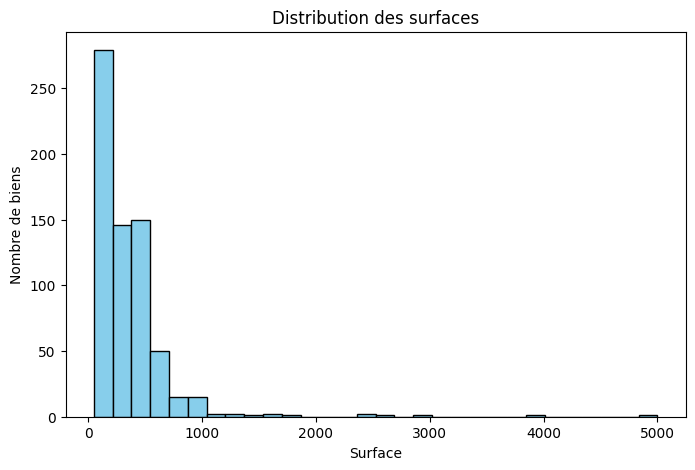

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_max_with_missing["surface"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution des surfaces")
plt.xlabel("Surface")
plt.ylabel("Nombre de biens")
plt.show()


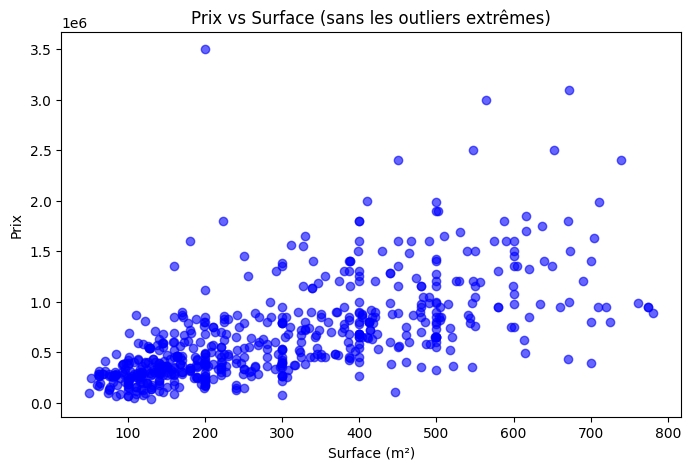

In [ ]:
import matplotlib.pyplot as plt

# On filtre les prix pour enlever l’outlier extrême
# Filtrer simultanément les 95% des valeurs normales pour surface et prix
surface_max = df_max_with_missing["surface"].quantile(0.95)  # top 5% des surfaces
prix_max = df_max_with_missing["prix"].quantile(0.95)        # top 5% des prix

filtered_df = df_max_with_missing[
    (df_max_with_missing["surface"] <= surface_max) &
    (df_max_with_missing["prix"] <= prix_max)
]
plt.figure(figsize=(8,5))
plt.scatter(filtered_df["surface"], filtered_df["prix"], alpha=0.6, color='blue')
plt.title("Prix vs Surface (sans les outliers extrêmes)")
plt.xlabel("Surface (m²)")
plt.ylabel("Prix")
plt.show()


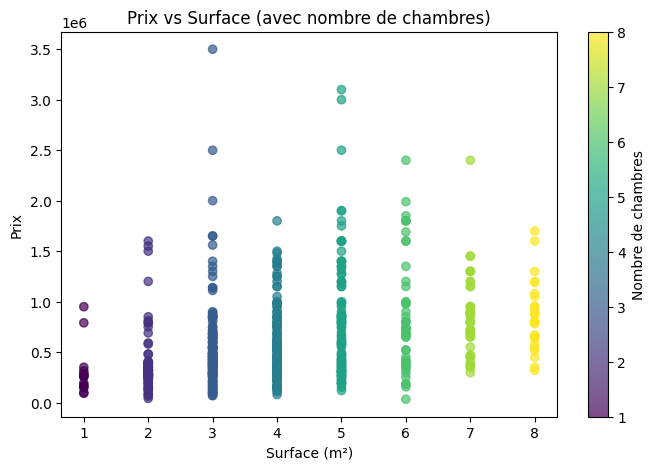

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les 95% des valeurs normales pour surface, prix et nombre de chambres
surface_max = df_max_with_missing["surface"].quantile(0.95)
prix_max = df_max_with_missing["prix"].quantile(0.95)
chambres_max = df_max_with_missing["nombre_des_chambres"].quantile(0.95)

filtered_df = df_max_with_missing[
    (df_max_with_missing["surface"] <= surface_max) &
    (df_max_with_missing["prix"] <= prix_max) &
    (df_max_with_missing["nombre_des_chambres"] <= chambres_max)
]

# Scatter plot : prix vs surface, couleur = nombre de chambres
plt.figure(figsize=(8,5))
scatter = plt.scatter(
    filtered_df["nombre_des_chambres"], 
    filtered_df["prix"], 
    c=filtered_df["nombre_des_chambres"],  # couleur selon nombre de chambres
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label="Nombre de chambres")
plt.title("Prix vs Surface (avec nombre de chambres)")
plt.xlabel("Surface (m²)")
plt.ylabel("Prix")
plt.show()


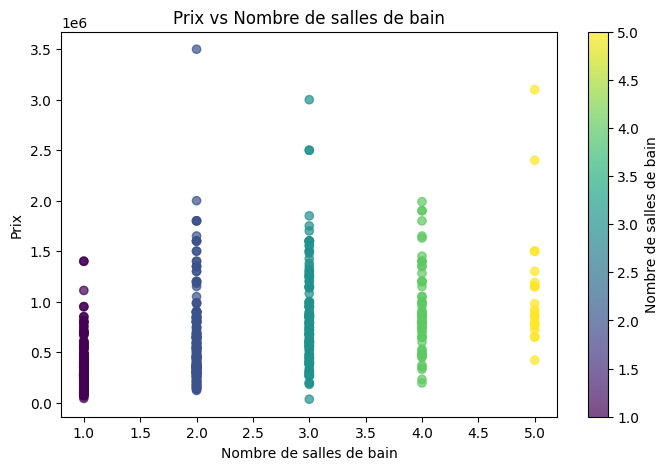

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les 95% des valeurs normales
surface_max = df_max_with_missing["surface"].quantile(0.95)
prix_max = df_max_with_missing["prix"].quantile(0.95)
bains_max = df_max_with_missing["nombre_des_salles_de_bains"].quantile(0.95)

filtered_df = df_max_with_missing[
    (df_max_with_missing["surface"] <= surface_max) &
    (df_max_with_missing["prix"] <= prix_max) &
    (df_max_with_missing["nombre_des_salles_de_bains"] <= bains_max)
]

# Scatter plot : prix vs nombre de salles de bains
plt.figure(figsize=(8,5))
scatter = plt.scatter(
    filtered_df["nombre_des_salles_de_bains"],
    filtered_df["prix"],
    c=filtered_df["nombre_des_salles_de_bains"],  # couleur = nb salles de bain
    cmap="viridis",
    alpha=0.7
)

plt.colorbar(scatter, label="Nombre de salles de bain")
plt.title("Prix vs Nombre de salles de bain")
plt.xlabel("Nombre de salles de bain")
plt.ylabel("Prix")
plt.show()


In [ ]:
# Boucle sur toutes les colonnes
for col in df_max_with_missing.columns:
    if df_max_with_missing[col].dtype == bool:
        df_max_with_missing[col] = df_max_with_missing[col].astype(int)

# Vérification
df_max_with_missing.dtypes


prix                          float64
categorie                       int64
surface                       float64
nombre_des_chambres           float64
nombre_des_salles_de_bains    float64
haut_standing                   int64
terrasse                        int64
balcon                          int64
etage                           int64
parking                         int64
ascenseur                       int64
jardin                          int64
vue_panoramique                 int64
climatiseur                     int64
chauffage_central               int64
piscine                         int64
dtype: object

In [ ]:
cols = ['nombre_des_chambres', 'nombre_des_salles_de_bains']
df_max_with_missing[cols] = df_max_with_missing[cols].apply(pd.to_numeric, errors='coerce')
cols = ['nombre_des_chambres', 'nombre_des_salles_de_bains']

df_max_with_missing[cols] = (
    df_max_with_missing[cols]
    .apply(pd.to_numeric, errors='coerce')  # sécurité : force en numérique
    .fillna(1)
)



In [ ]:
df_max_with_missing[df_max_with_missing.isna().any(axis=1)]

,prix,categorie,surface,nombre_des_chambres,nombre_des_salles_de_bains,haut_standing,terrasse,balcon,etage,parking,ascenseur,jardin,vue_panoramique,climatiseur,chauffage_central,piscine
id,,,,,,,,,,,,,,,,


In [ ]:
# S'assurer que df_final est indexé par 'id'
df_final_idx = df_final.set_index("id") if "id" in df_final.columns else df_final

# Ajouter lat et lon à df_max_with_missing
df_max_with_missing[["lat", "lon"]] = df_final_idx.loc[
    df_max_with_missing.index, ["lat", "lon"]
]

In [ ]:
df_max_with_missing.head()

,prix,categorie,surface,nombre_des_chambres,nombre_des_salles_de_bains,haut_standing,terrasse,balcon,etage,parking,ascenseur,jardin,vue_panoramique,climatiseur,chauffage_central,piscine,lat,lon
id,,,,,,,,,,,,,,,,,,
687a2a81d5464a896caf94d1,530000.0,0,424.0,3.0,1.0,0,0,1,0,1,0,1,0,0,0,0,36.813376,10.293059
694257f28914daae519cbc60,650000000.0,0,495.0,8.0,4.0,0,1,1,2,1,0,1,0,0,1,0,36.882664,10.179113
6852dd0f8a733cfc286dcaf0,1150000.0,0,500.0,7.0,5.0,1,1,0,3,1,0,1,1,1,1,0,36.835613,10.158362
6932d0af8914daae51964b23,1800000.0,0,670.0,6.0,2.0,0,0,0,0,0,0,0,0,0,0,0,36.849151,10.174513
69426a45cd04d08be74c4ca8,400000.0,0,460.0,6.0,3.0,0,0,0,4,1,0,0,0,0,0,0,36.742946,10.250763


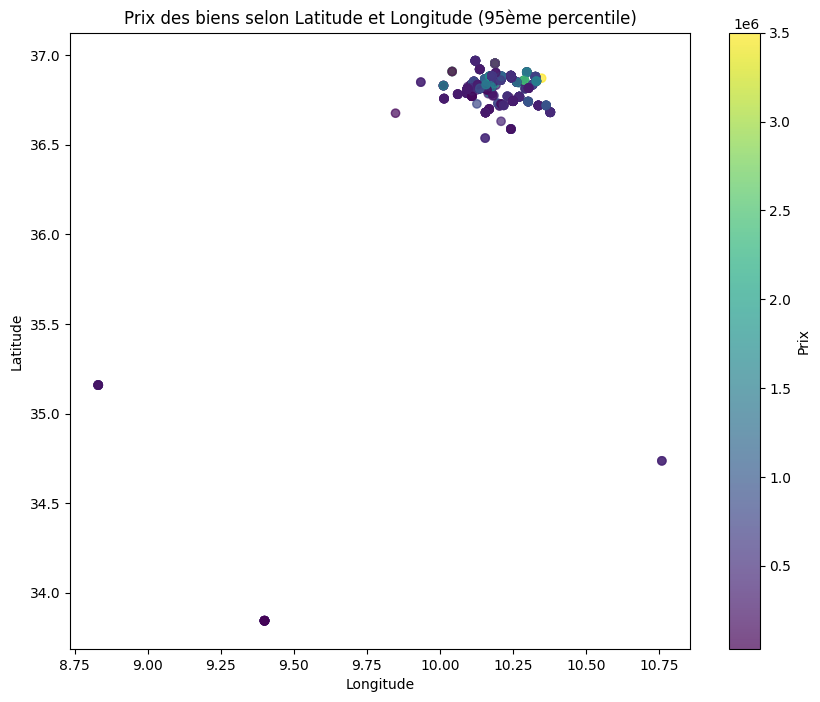

In [ ]:
import matplotlib.pyplot as plt

# Filtrage au 95ème percentile
q95 = df_max_with_missing['prix'].quantile(0.95)
df_filtered = df_max_with_missing[df_max_with_missing['prix'] <= q95]

# Scatter plot lat vs lon, couleur = prix
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=df_filtered['lon'],   # longitude sur l'axe x
    y=df_filtered['lat'],   # latitude sur l'axe y
    c=df_filtered['prix'],  # prix pour la couleur
    cmap='viridis',         # palette de couleurs
                 # taille des points
    alpha=0.7               # transparence
)

plt.colorbar(scatter, label='Prix')  # légende pour la couleur
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prix des biens selon Latitude et Longitude (95ème percentile)')
plt.show()


In [ ]:
df_max_with_missing.to_csv("final_tayara_data.csv", index=False)

In [ ]:
len(df_max_with_missing)

669

#Model

In [ ]:
from sklearn.model_selection import train_test_split

# Label

y = np.log1p(df_max_with_missing["prix"].values).reshape(-1,1)
#y = df_max_with_missing["prix"].values.reshape(-1,1)
# Features
X = df_max_with_missing.drop(columns=["prix"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)



In [ ]:


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 0.85
R²: 0.15


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=200,   # number of trees
    learning_rate=0.05, # smaller learning rate for stability
    max_depth=5,
    subsample=0.8,      # optional, helps prevent overfitting
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model on scaled data
model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 0.53
R²: 0.12
